# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/Part01'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

## AMT_ANNUITY

In [10]:
app_train['ANNUITY_cut'] = pd.cut(app_train['AMT_ANNUITY'], 10)
app_train['ANNUITY_cut'].value_counts()

(1359.09, 27256.5]      178956
(27256.5, 52897.5]      112452
(52897.5, 78538.5]       14399
(78538.5, 104179.5]       1268
(104179.5, 129820.5]       302
(129820.5, 155461.5]        61
(206743.5, 232384.5]        33
(155461.5, 181102.5]        22
(181102.5, 206743.5]         5
(232384.5, 258025.5]         1
Name: ANNUITY_cut, dtype: int64

In [12]:
app_train.groupby(['ANNUITY_cut'])['TARGET'].value_counts().sort_index()

ANNUITY_cut           TARGET
(1359.09, 27256.5]    0         164465
                      1          14491
(27256.5, 52897.5]    0         103013
                      1           9439
(52897.5, 78538.5]    0          13557
                      1            842
(78538.5, 104179.5]   0           1222
                      1             46
(104179.5, 129820.5]  0            296
                      1              6
(129820.5, 155461.5]  0             60
                      1              1
(155461.5, 181102.5]  0             22
(181102.5, 206743.5]  0              5
(206743.5, 232384.5]  0             33
(232384.5, 258025.5]  0              1
Name: TARGET, dtype: int64

In [14]:
app_train['ANNUITY_qcut'] = pd.qcut(app_train['AMT_ANNUITY'], 4)
app_train.groupby(['ANNUITY_qcut'])['TARGET'].value_counts().sort_index()

ANNUITY_qcut         TARGET
(1615.499, 16524.0]  0         71463
                     1          5430
(16524.0, 24903.0]   0         70150
                     1          6730
(24903.0, 34596.0]   0         69857
                     1          7105
(34596.0, 258025.5]  0         71204
                     1          5560
Name: TARGET, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

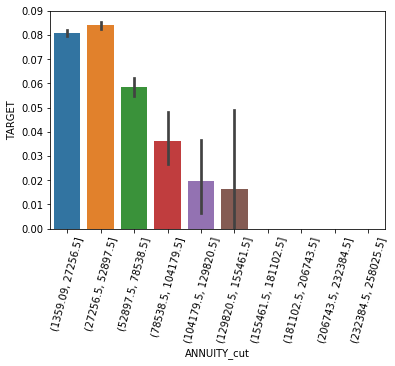

In [33]:
import seaborn as sns

sns.barplot(x = 'ANNUITY_cut', y = 'TARGET', data = app_train)
plt.xticks(rotation = 75)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

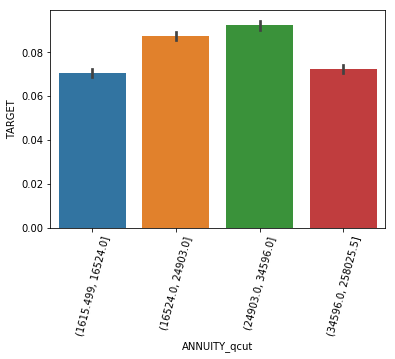

In [34]:
sns.barplot(x = 'ANNUITY_qcut', y = 'TARGET', data = app_train)
plt.xticks(rotation = 75)

In [ ]:
## DAYS_EMPLOYED

In [66]:
app_train['DAYS_EMPLOYED'].isnull().value_counts()

False    252137
True      55374
Name: DAYS_EMPLOYED, dtype: int64

In [39]:
app_train['YEARS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED']) / 365
app_train['YEARS_EMPLOYED'].value_counts()
print('max: {}'.format(app_train['YEARS_EMPLOYED'].max()))
print('min: {}'.format(app_train['YEARS_EMPLOYED'].min()))

max: 49.07397260273972
min: 0.0


In [59]:
years_intervals = np.arange(0,51,10)
app_train['YEARS_EMPLOYED_cut'] = pd.cut(app_train['YEARS_EMPLOYED'], bins = years_intervals)
app_train['YEARS_EMPLOYED_cut'].value_counts()

(0, 10]     201181
(10, 20]     38398
(20, 30]      9551
(30, 40]      2771
(40, 50]       234
Name: YEARS_EMPLOYED_cut, dtype: int64

In [60]:
app_train.groupby(['YEARS_EMPLOYED_cut'])['TARGET'].value_counts()

YEARS_EMPLOYED_cut  TARGET
(0, 10]             0         181990
                    1          19191
(10, 20]            0          36281
                    1           2117
(20, 30]            0           9122
                    1            429
(30, 40]            0           2675
                    1             96
(40, 50]            0            233
                    1              1
Name: TARGET, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

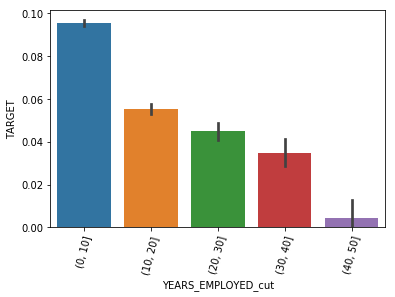

In [61]:
sns.barplot(x = 'YEARS_EMPLOYED_cut', y = 'TARGET', data = app_train)
plt.xticks(rotation = 75)